In [ ]:
# Loading the dataset
import pandas as pd

df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [2]:
# Inspecting the dataset...
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum().sort_values()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [5]:
df.loc[df.isnull().any(axis=1)==False,:]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [6]:
# Keeping only the text and its labels
data = df[['v1', 'v2']]

In [7]:
# Renaming the columns
data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

<ipython-input-7-0a842cd6414a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)


In [8]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().sum().sort_values()

,0
label,0
message,0


In [11]:
# Checking for duplicates
data.duplicated().sum()

np.int64(403)

In [12]:
# Drop duplicates
data.drop_duplicates(inplace=True)

<ipython-input-12-04c61fb5f4c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [13]:
# The independent feature
X = data[['message']]
# The dependent feature (label)
y = data['label']

In [14]:
# Enconding the label
y = pd.get_dummies(y, drop_first = True, dtype='int')['spam'] # spam == 1, ham == 0

In [15]:
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [16]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [17]:
X_train.shape

(4135, 1)

In [18]:
X_test.shape

(1034, 1)

In [19]:
# Checking for the class balance:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1]), array([3631,  504]))

In [21]:
## Oversmapling the training data:
from imblearn.over_sampling import RandomOverSampler
X_train_resampled, y_train_resampled = RandomOverSampler().fit_resample(X_train, y_train)

In [23]:
y_train_resampled.value_counts()

,count
spam,
0,3631
1,3631


In [22]:
# Importing the tokenizer and instanciate it with the distilbert-base-uncased model
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [24]:
# Tokenize the datasets
train_encodings = tokenizer(list(X_train_resampled['message']), truncation=True, padding=True, max_length=175, return_tensors='pt')
test_encodings = tokenizer(list(X_test['message']), truncation=True, padding=True, max_length=175, return_tensors='pt')

In [25]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset
train_dataset = CustomDataset(train_encodings, list(y_train_resampled))
test_dataset = CustomDataset(test_encodings, list(y_test))

In [27]:
# defining the model hyperparameters for training
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
    eval_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
)

In [30]:
from evaluate import load

metric = load("accuracy")

In [31]:
import numpy as np

# function to compute the ccuracy metric from the predictions
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# Download the pretrained model and fine-tune it
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

trainer = Trainer(
    model = model,  # the instanciated Transformers model to be trained
    args = training_args,   # training arguments defined above
    train_dataset = train_dataset,  # training dataset
    eval_dataset = test_dataset,   # evaluation dataset
    tokenizer=tokenizer,  # the instanciated tokenizer
    compute_metrics=compute_metrics  # function to compute the accuracy
)

trainer.train()

In [33]:
trainer.evaluate()

{'eval_loss': 0.06715049594640732,
 'eval_accuracy': 0.9903288201160542,
 'eval_runtime': 3.8717,
 'eval_samples_per_second': 267.066,
 'eval_steps_per_second': 16.788,
 'epoch': 3.0}

In [34]:
predictions = trainer.predict(test_dataset)

In [35]:
predictions

PredictionOutput(predictions=array([[ 4.544945 , -4.0310163],
       [ 4.4658065, -4.0066805],
       [ 4.618687 , -4.1359434],
       ...,
       [ 4.670805 , -4.1839333],
       [ 4.526773 , -4.0362372],
       [ 4.661195 , -4.1538625]], dtype=float32), label_ids=array([0, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.06715049594640732, 'test_accuracy': 0.9903288201160542, 'test_runtime': 3.9039, 'test_samples_per_second': 264.863, 'test_steps_per_second': 16.65})

In [36]:
output = np.argmax(predictions[0], axis=1)

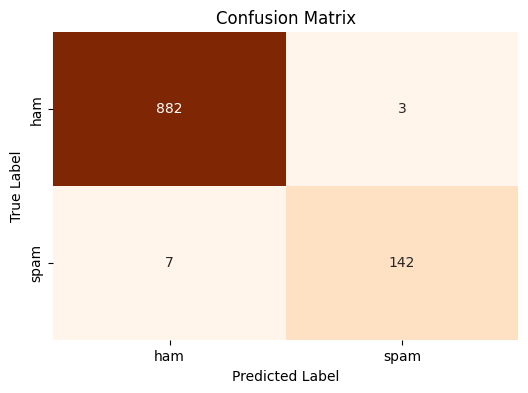

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, output)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['ham', 'spam'],
            yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
# The classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, output))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       885
           1       0.98      0.95      0.97       149

    accuracy                           0.99      1034
   macro avg       0.99      0.97      0.98      1034
weighted avg       0.99      0.99      0.99      1034

